In [1]:
from sympy import *
init_printing()
from IPython.display import display
from sympy.physics.matrices import msigma
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import Ket, Bra
from sympy.physics.quantum.state import Wavefunction
from sympy.physics.quantum import TensorProduct as TP

# Problema 3

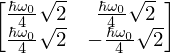

In [2]:
h, B0, w0 = symbols('hbar B_0 omega_0', positive=True, real=True)

H = w0/sqrt(2) * msigma(1)*h/2 + w0/sqrt(2) * msigma(3)*h/2
display(H)
#0.25 

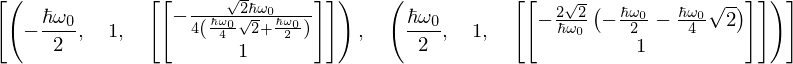

'sn_dn'

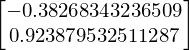

'sn_up'

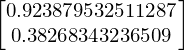

In [3]:
display(H.eigenvects())
vec1 = simplify(H.eigenvects()[0][2][0])
vec2 = simplify(H.eigenvects()[1][2][0])
val1 = simplify(H.eigenvects()[0][0])
val2 = simplify(H.eigenvects()[1][0])
Nsq=(Dagger(vec1)*vec1)[0]
vec1/=sqrt(Nsq)
display('sn_dn',simplify(vec1.evalf()))
Nsq=(Dagger(vec2)*vec2)[0]
vec2/=sqrt(Nsq)
display('sn_up',simplify(vec2.evalf()))
#0.25

'sn_up'

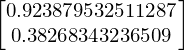

'sn_dn'

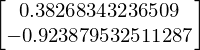

In [4]:
th, phi, w = symbols('theta phi omega', real=True)
chi_n_up = Matrix([[cos(th/2)],[sin(th/2)*exp(I*phi)]])
chi_n_dn = Matrix([[sin(th/2)],[-cos(th/2)*exp(I*phi)]])
sn_up = chi_n_up.subs(th,pi/4).subs(phi,0)
sn_dn = chi_n_dn.subs(th,pi/4).subs(phi,0)
display('sn_up',sn_up.evalf())
display('sn_dn',sn_dn.evalf())

In [5]:
asq, bsq,t = symbols('a^2 b^2 t', positive=True, real=True)
minus = Matrix([[0], [1]])
solve(Eq(minus[0], asq*vec1[0] + bsq*vec2[0]), (asq,bsq))[0][asq]
solve(Eq(minus[1], asq*vec1[1] + bsq*vec2[1]), (asq,bsq))[0][asq]
b = solve(Eq(solve(Eq(minus[0], asq*vec1[0] + bsq*vec2[0]),\
                   (asq,bsq))[0][asq],solve(Eq(minus[1], asq*vec1[1] + bsq*vec2[1]), (asq,bsq))[0][asq]))[0]
a = solve(Eq(minus[1], asq*vec1[1] + bsq*vec2[1]), (asq,bsq))[0][asq].subs(bsq, b)
display('P_sn_dn=a**2',(a**2).evalf(),'P_sn_up=b**2',(b**2).evalf())
#Se pueden obtener -hw/2 con probabilidad a**2 y hw/2 con probabilidad b**2

'P_sn_dn=a**2'

'P_sn_up=b**2'

'psi_t'

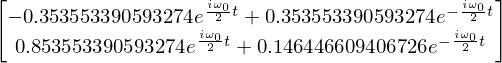

In [6]:
minus_t = exp(-I*val1*t/h)*a*vec1 + exp(-I*val2*t/h)*b*vec2
display('psi_t',trigsimp(minus_t.evalf()))

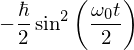

In [7]:
avg_Sx = h/2 * Dagger(minus_t)*msigma(1)*minus_t
display(simplify(avg_Sx[0].rewrite(sin)))

# Problema 7

'S1y'

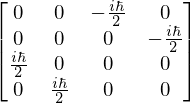

In [8]:
from sympy.physics.quantum import TensorProduct as TP
S1y = h/2 * TP(msigma(2), eye(2))
display('S1y',S1y)

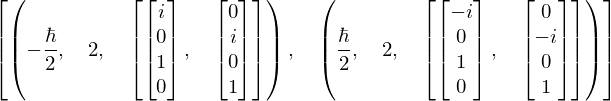

In [9]:
S1y.eigenvects()

In [10]:
a, b, g, d = symbols('alpha beta gamma delta', real=False)
Ket_p = Matrix([[1],[0]])
Ket_m = Matrix([[0],[1]])
Ket_pp = TP(Ket_p,Ket_p)
Ket_pm = TP(Ket_p,Ket_m)
Ket_mp = TP(Ket_m,Ket_p)
Ket_mm = TP(Ket_m,Ket_m)
init = a*Ket_pp + b*Ket_pm + g*Ket_mp + d*Ket_mm
init

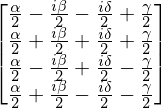

In [11]:
sx = [chi_n_up.subs(th,pi/2).subs(phi,0),chi_n_dn.subs(th,pi/2).subs(phi,0)]
sy = [chi_n_up.subs(th,pi/2).subs(phi,pi/2),chi_n_dn.subs(th,pi/2).subs(phi,pi/2)]
Ket_pxpy = TP(sx[0],sy[0])
Ket_pxmy = TP(sx[0],sy[1])
Ket_mxpy = TP(sx[1],sy[0])
Ket_mxmy = TP(sx[1],sy[1])
Base_change=Matrix([Ket_pxpy,Ket_pxmy,Ket_mxpy, Ket_mxmy]).reshape(4,4).transpose()
init_sxsy = Dagger(Base_change)*init
display(init_sxsy)

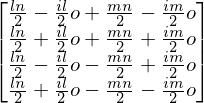

In [12]:
l, m, n, o = symbols('l m n o', real=False)
Ket_z1 = l*Ket_p + m*Ket_m
Ket_z2 = n*Ket_p + o*Ket_m
state= expand(TP(Ket_z1,Ket_z2))
state_sxsy = simplify(Dagger(Base_change)*state)
display(state_sxsy)
solve(init_sxsy-state_sxsy)

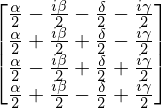

In [13]:
Ket_pypy = TP(sy[0],sy[0])
Ket_pymy = TP(sy[0],sy[1])
Ket_mypy = TP(sy[1],sy[0])
Ket_mymy = TP(sy[1],sy[1])
Base_change=Matrix([Ket_pypy,Ket_pymy,Ket_mypy, Ket_mymy]).reshape(4,4).transpose()
init_sysy = Dagger(Base_change)*init
display(init_sysy)

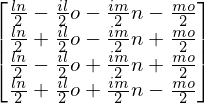

In [14]:
state_sysy = simplify(Dagger(Base_change)*state)
display(state_sysy)
solve(init_sysy-state_sysy)

'Psy-, b'

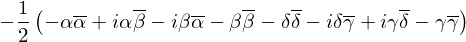

'Psy-,c'

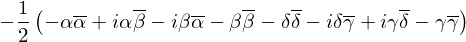

In [15]:
#De b:
Pb = init_sxsy.conjugate().multiply_elementwise(init_sxsy)
display('Psy-, b', factor(Pb[1]+Pb[3]))
#De c:
Pc = init_sysy.conjugate().multiply_elementwise(init_sysy)
display('Psy-,c', factor(Pc[1]+Pc[3]))